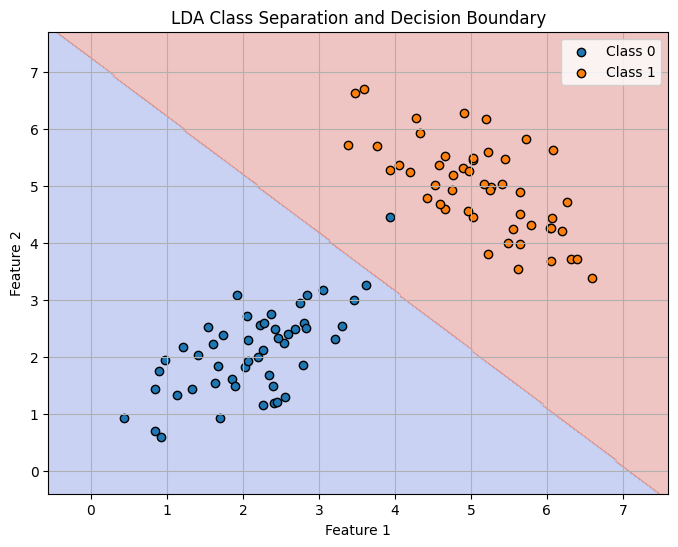

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate synthetic 2D data
np.random.seed(42)
class_0 = np.random.multivariate_normal(mean=[2, 2], cov=[[0.8, 0.6], [0.6, 0.8]], size=50)
class_1 = np.random.multivariate_normal(mean=[5, 5], cov=[[0.8, -0.6], [-0.6, 0.8]], size=50)

X = np.vstack((class_0, class_1))
y = np.array([0]*50 + [1]*50)

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Predict on grid to show decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = lda.predict(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, preds, alpha=0.3, cmap='coolwarm')
plt.scatter(class_0[:, 0], class_0[:, 1], label="Class 0", edgecolor='k')
plt.scatter(class_1[:, 0], class_1[:, 1], label="Class 1", edgecolor='k')
plt.title("LDA Class Separation and Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


[[-0.67364307 -0.28925851]
 [-1.16982947  0.58536733]
 [ 0.36877088 -0.03278519]
 [-2.34824567 -0.23755803]
 [ 0.56622885  0.50614776]
 [ 0.73024307 -0.06621073]
 [-0.01231359 -1.18403848]
 [ 2.5176897   0.41541768]
 [ 1.36807069  0.60807891]
 [ 1.51635001 -0.41214195]
 [-2.0188848  -0.75055143]
 [ 0.14897431 -0.83382705]
 [ 0.74523954  0.29406897]
 [ 1.55151253  0.7015298 ]
 [ 0.89310009  0.09046191]
 [ 0.52776914  1.30247344]
 [ 0.19992037 -0.59197508]
 [-0.94582495 -1.03951607]
 [ 0.0420884  -1.19618498]
 [ 1.83085848  0.67578383]
 [-1.06599887 -0.21704071]
 [ 0.21386833 -0.12099795]
 [ 2.19875069  0.22165338]
 [ 0.46578444  0.7931711 ]
 [-0.18072671 -1.14234616]
 [-0.38907031 -0.35535981]
 [ 0.84562338  0.6333797 ]
 [-1.60668369  0.08804575]
 [ 1.23102049  0.18196866]
 [-0.63195016  0.41047857]
 [ 0.70444285  0.09875437]
 [ 1.75776999 -0.20573471]
 [-1.37269474  0.42105136]
 [-0.07061323  0.59770349]
 [-0.39729484 -0.51826815]
 [-0.77049185  0.71553474]
 [-0.2174145   0.8994071 ]
 

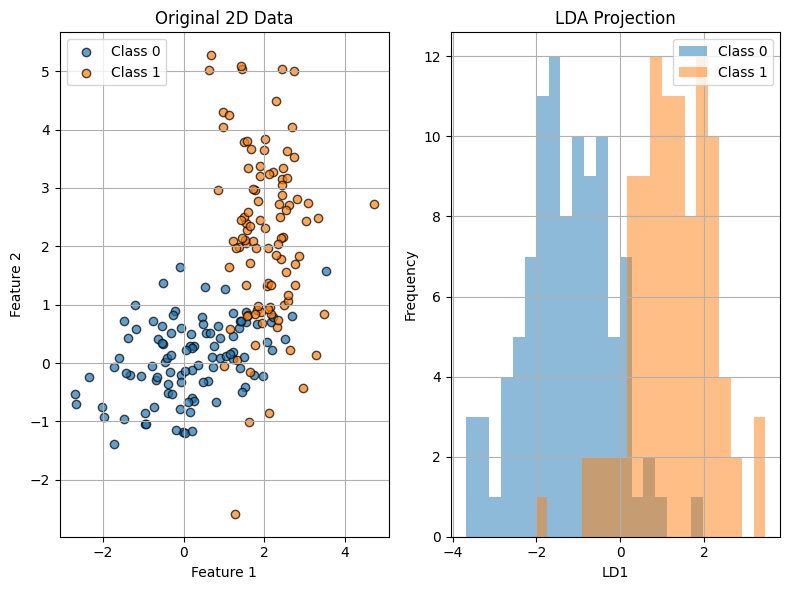

Explained variance ratio: 1.000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Generate synthetic 2D data for 2 classes
np.random.seed(42)
n_samples = 100
n_features = 2

# Generate data for class 0 - more spread out horizontally
class_0 = np.random.multivariate_normal(
    mean=[0, 0], 
    cov=[[2, 0.5], [0.5, 0.5]], 
    size=n_samples
)

# Generate data for class 1 - more spread out vertically
class_1 = np.random.multivariate_normal(
    mean=[2, 2], 
    cov=[[0.5, 0], [0, 2]], 
    size=n_samples
)

# Combine data and create labels
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
print(X)
print(y)

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Plot original data
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0', alpha=0.7, edgecolor='k')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', alpha=0.7, edgecolor='k')
plt.title('Original 2D Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Plot LDA projection
plt.subplot(122)
plt.hist(X_lda[y==0], bins=20, alpha=0.5, label='Class 0')
plt.hist(X_lda[y==1], bins=20, alpha=0.5, label='Class 1')
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {lda.explained_variance_ratio_[0]:.3f}")




(150,)
[[-1.45927545 -0.02854376]
 [-1.79770574 -0.4843855 ]
 [-2.41694888  0.09278403]
 [-2.26247349  1.58725251]
 [-2.54867836  0.4722049 ]
 [-2.42996725  0.96613207]
 [-2.44848456 -0.79596195]
 [-0.22266651  1.58467318]
 [-1.75020123  0.82118013]
 [-1.95842242  0.35156375]
 [-1.19376031  2.6344557 ]
 [-1.85892567 -0.31900654]
 [-1.15809388  2.64340991]
 [-2.66605725  0.64250454]
 [-0.37836722 -0.08663893]
 [-1.20117255 -0.08443736]
 [-2.76810246 -0.03219954]
 [-0.77685404  1.65916185]
 [-3.49805433  1.68495616]
 [-1.09042788  1.6265835 ]
 [-3.71589615 -1.04451442]
 [-0.99761037  0.4905306 ]
 [-3.83525931  1.40595806]
 [-2.25741249  1.42679423]
 [-1.25571326  0.5464242 ]
 [-1.43755762  0.13442498]
 [-2.45906137  0.93527728]
 [-3.51848495 -0.16058887]
 [-2.58979871  0.17461173]
 [ 0.30748788  1.31887146]
 [-1.10669179  1.75225371]
 [-0.60552459  1.94298038]
 [-0.89870377  0.90494003]
 [-4.49846635  0.88274992]
 [-2.93397799 -0.02737911]
 [-2.10360821 -1.19156767]
 [-2.14258208 -0.0887

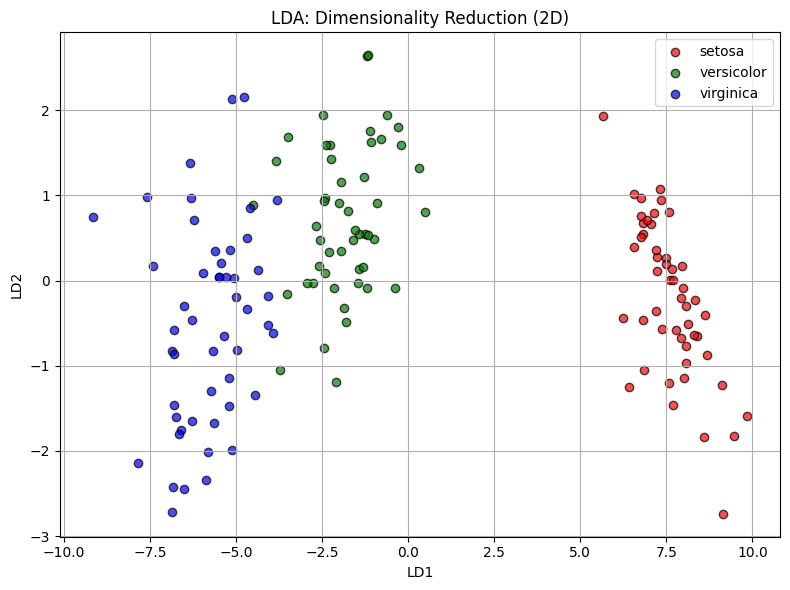

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load dataset (3 classes, 4 features)
data = load_iris()
X = data.data         # shape (150, 4)
y = data.target       # shape (150,)
target_names = data.target_names

# Apply LDA to reduce to 2D
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
print(y.shape)
print(X_lda[y == 1])

# Plot the reduced data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for color, i, label in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.7, color=color, label=label, edgecolor='k')

plt.title('LDA: Dimensionality Reduction (2D)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
